<!-- dom:TITLE: Programmation Python  pour les mathématiques -->
# Python Programming for Mathematics
<!-- dom:AUTHOR: Julien Guillod at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licensed <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>


All chapters are available in
[HTML](https://python.guillod.org//) and [PDF](https://python.guillod.org//python.pdf).
This notebook is also executed on [mybinder](https://mybinder.org/v2/gh/juguillod/python/master?filepath=chap08.ipynb).






# 8 Probability and Statistics
<div id="ch:proba-stats"></div>

First, we study the statistics of the proportion of numbers having some values of their first digits. Then, we introduce two important probablity models.

**This chapter covers:**

* Statistics and probability

* Importing data

* Diagrams

* Optimisation by compilation

* Random steps

* Percolation





<!-- --- begin exercise --- -->

# Exercise 8.1: Benford's law

Benford's law predicts that statistically, in a given list of numbers the probability that a number starts with the digit one is greater than that of the digit nine. More precisely, Benford's law predicts that the probability of a number starting with the digit $d$ is:

$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$

where $\log_10$ designates the logarithm in base 10.

It is possible to verify that Benford's law is the only one that stays the same by changing of units, *i.e.* by multiplying the numbers in the list by a scalar the said probability is left unchanged.

**a)**
Écrire une fonction `firstdigit(n)` qui donné un nombre `n` retourne son premier chiffre et une fonction `occurrences(liste)` qui retourne le nombre d'occurrences des premiers chiffres de `liste`.
Write a function `fistdigit(n)` which, given a number `n`, returns its first digit, and another function `occurences(list_nums)` which returns the number of occurences of first digits of `list_nums`.

<!-- --- begin hint in exercise --- -->

**Hints:**
`occurence` should ignore the zeros in `list_nums`.

<!-- --- end hint in exercise --- -->



In [1]:
def firstdigit(n):
    return int(str(n)[0])

def occurrences(list_nums):
    # This function returns a list of 10 elements in which each element's index corresponds to the digit. The values increment while we iterate
    # the list in the function's argument. If we see a zero, simply ignore it. The index 0 of the returned list is always zero
    
    results = [0]*10
    for x in list_nums:
        if x != 0:
            results[firstdigit(x)] += 1
    return results

l = [7,0,13,23,71,45,499,5,57]
occurrences(l)

[0, 1, 1, 0, 2, 2, 0, 2, 0, 0]



**b)**
Verify the Benford's law with the sequence of numbers $(2^n)_ {n\in\mathbb{N}}$ by comparing empirical histograms with the results of Benford's law.

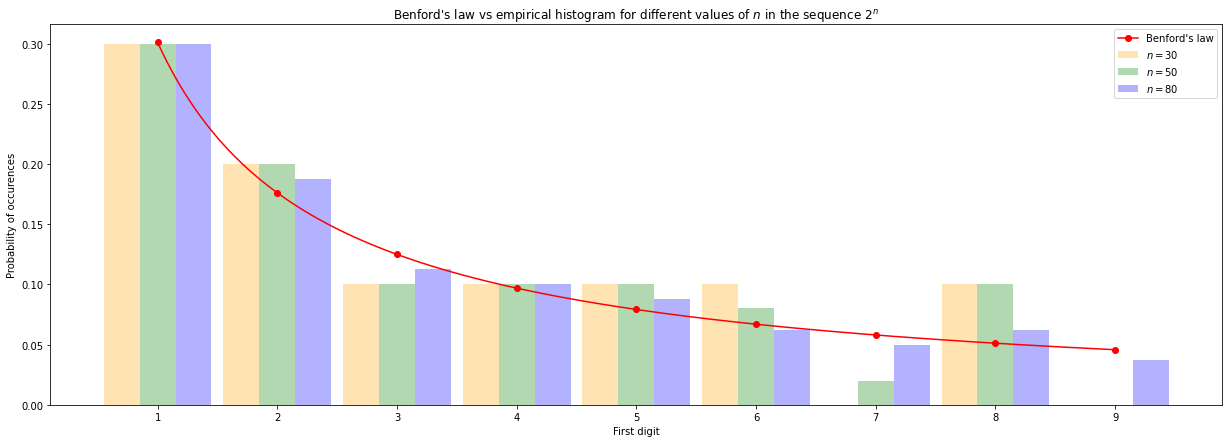

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def benford(n):
    return np.log10(1+1/n)

F = lambda n: 2**n

n_ = [30,50,80]
colors=['orange','green','blue']
x = np.arange(1,10)
x_dense = np.linspace(1,9,1001)
width = 0.3

fig, ax = plt.subplots(figsize=(21,7))

for i, n in enumerate(n_):
    list_nums = F(np.arange(n, dtype=object))
    ax.bar(x + (i-1)*width, np.array(occurrences(list_nums)[1:])/n, width, label=f"$n={n}$", color=colors[i], alpha=0.3)

ax.plot(x_dense, benford(x_dense), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for different values of $n$ in the sequence $2^n$")
plt.legend()
plt.show()

> The sequence $(2^n)_ {n\in\mathbb{N}}$ behaves like the prediction of Benford's law.

**c)**
Try this time with the sequence $(3n+1)_ {n\in\mathbb{N}}$.

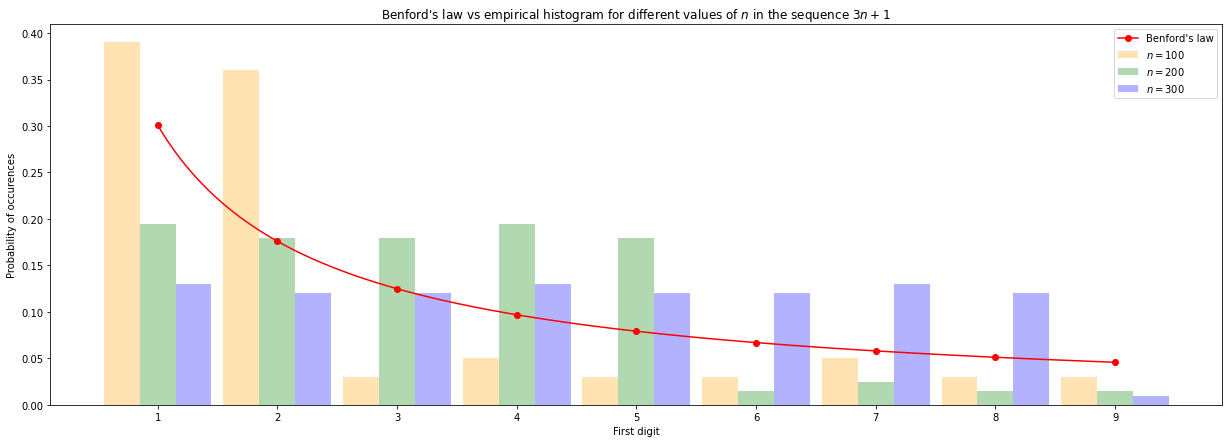

In [34]:
F = lambda n: 3*n+1

n_ = [100,200,300]
width = 0.3

fig, ax = plt.subplots(figsize=(21,7))

for i, n in enumerate(n_):
    list_nums = F(np.arange(n, dtype=object))
    ax.bar(x + (i-1)*width, np.array(occurrences(list_nums)[1:])/n, width, label=f"$n={n}$", color=colors[i], alpha=0.3)
ax.plot(x_dense, benford(x_dense), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for different values of $n$ in the sequence $3n+1$")
plt.legend()
plt.show()

> The sequence $(3n+1)_ {n\in\mathbb{N}}$ doesn't seem to behave according to Benford's law.


**d)**
Go to the website of INSEE (the National Institute of Statistics and Economics Studies) <https://insee.fr/fr/statistiques/3561090?sommaire=3561107> then download the file **POP1A.txt**. Import the data to obtain the population by postal codes, sexes, and ages.

<!-- --- begin hint in exercise --- -->

**Hints:**
The documentation on how to read a file is available [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files). Note that the TXT file is encoded with ISO-8859-1 format.

<!-- --- end hint in exercise --- -->



In [4]:
with open('BTT_TD_POP1A_2015.txt', 'r') as f:
    for _ in range(10):
        print(f.readline())

NIVGEO;CODGEO;LIBGEO;SEXE;AGEPYR10;NB

ARM;13201;Marseille 1er Arrondissement;1;00;862.93633739

ARM;13201;Marseille 1er Arrondissement;1;03;633.7286466

ARM;13201;Marseille 1er Arrondissement;1;06;1115.3709544

ARM;13201;Marseille 1er Arrondissement;1;11;1302.8362889

ARM;13201;Marseille 1er Arrondissement;1;18;2503.6467067

ARM;13201;Marseille 1er Arrondissement;1;25;4622.2283093

ARM;13201;Marseille 1er Arrondissement;1;40;4259.70682

ARM;13201;Marseille 1er Arrondissement;1;55;2192.8556468

ARM;13201;Marseille 1er Arrondissement;1;65;2435.1245446




**e)**
Determine if the population by communities, sexes, and ages follow Benford's law.

In [37]:
# For ease of use, we are going to use the pandas library to read the data into memory.

import pandas as pd

data = pd.read_csv('BTT_TD_POP1A_2015.txt', sep=';', encoding='latin_1')
data.head()

/Users/trungdam/opt/anaconda3/envs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,ARM,13201,Marseille 1er Arrondissement,1,0,862.936337
1,ARM,13201,Marseille 1er Arrondissement,1,3,633.728647
2,ARM,13201,Marseille 1er Arrondissement,1,6,1115.370954
3,ARM,13201,Marseille 1er Arrondissement,1,11,1302.836289
4,ARM,13201,Marseille 1er Arrondissement,1,18,2503.646707


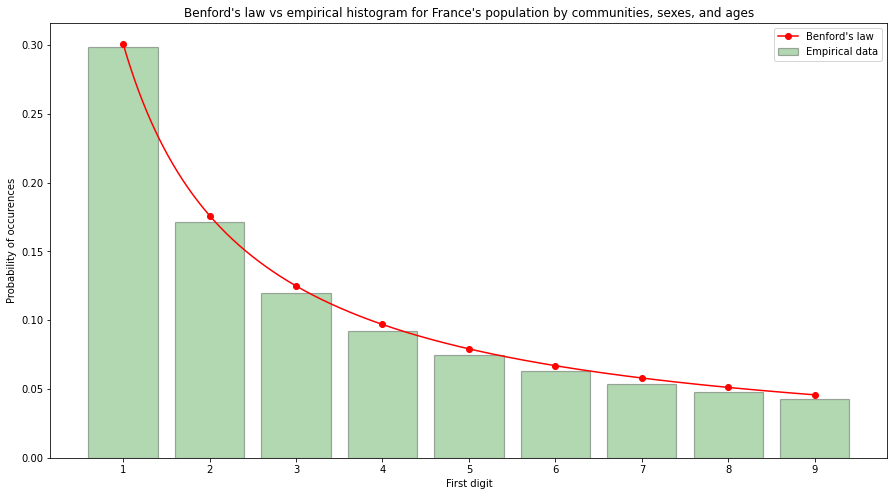

In [39]:
width = 0.8
n = data.shape[0]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, np.array(occurrences(data['NB'])[1:])/n, width, label="Empirical data", color='green', edgecolor="black", linewidth=1.2, alpha=0.3)
ax.plot(x_dense, benford(x_dense), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for France's population by communities, sexes, and ages")
plt.legend()
plt.show()

> This set of data is a perfect example of Benford's law in real life


**f)**
Sum the data by communities to determine if the new data follow Benford's law.

In [40]:
grouped_by_community = data.groupby(['CODGEO']).sum()
grouped_by_community.head()

,SEXE,AGEPYR10,NB
CODGEO,,,
1001,30,606,767.0
1002,30,606,241.0
1004,30,606,14127.0
1005,30,606,1619.0
1006,30,606,109.0


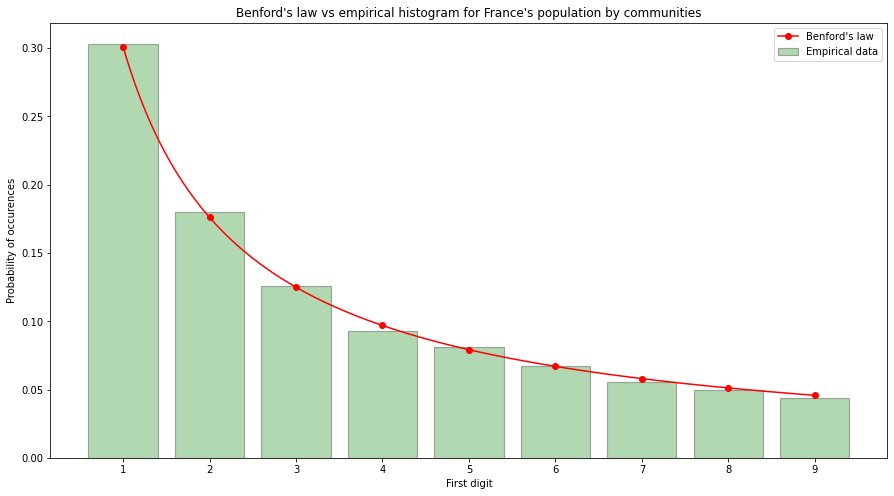

In [43]:
n = grouped_by_community.shape[0]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, np.array(occurrences(grouped_by_community['NB'])[1:])/n, width, label="Empirical data", color='green', edgecolor="black", linewidth=1.2, alpha=0.3)
ax.plot(x_dense, benford(x_dense), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for France's population by communities")
plt.legend()
plt.show()


<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 8.2: Coin flip

The goal of this exercise is to simulate the evolution of a player's money in a coin flip (head or tail). In each turn, the player wins one franc if it's tail and lose one if it's head. The probability of having a tail is $p$, a head is $q$. If the coin is unbiased then $p=q=\frac{1}{2}$.

Mathematically, the sum $S_i$ of money the player has at time $i$ is given by a random step:

$$
S_{i}=\begin{cases}
0\,, & \text{if}\:S_i=0\,,\\ 
S_{i-1}+X_{i}\,, & \text{if}\:S_i\geq1\,,
\end{cases}
$$

where $(X_i)_ {i\geq1}$ are independent random variables of law $\mathbb{P}(X_i=1) = p$ and $\mathbb{P}(X_i=-1) = q$.


**a)**
Write a function `simulate(p,k,N)` generating a game of $N$ coin flips starting from $S_0=k$. Represent graphically multiple generations.

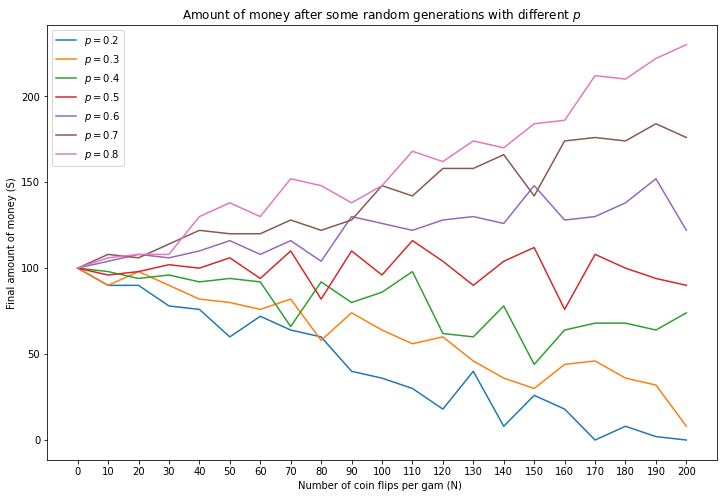

In [49]:
def simulate(p, k, N):
    if N == 0:
        return k
    game = np.random.rand(N)
    winning = np.sum(game <= p)
    losing = N - winning
    S = k + winning - losing
    if S <= 0:
        return 0
    return S

k = 100
N = np.arange(0,201,10)
list_p = np.arange(2,9)/10

plt.figure(figsize=(12,8))
plt.title('Amount of money after some random generations with different $p$')
plt.xlabel('Number of coin flips per gam (N) ')
plt.ylabel('Final amount of money (S)')
plt.xticks(N)


for p in list_p:
    plt.plot(N, [simulate(p,k,n) for n in N], label=f"$p={p}$")

plt.legend()
plt.show()


**b)**
Simuler un joueur qui commençant avec une somme $k$ joue jusqu'à tout perdre ou avoir la somme $n > k$.



In [52]:
def all_or_nothing(p, k, n):
    N = 0
    while 0 < k < n:
        x = np.random.rand()
        if x <= p:
            k += 1
        else:
            k -= 1
        N += 1
    if k == n:
        return True, N  # win
    return False, N  # lose

# We are going to simulate 1000 games for each p in {0.2,...,0.8}. To prevent a long wait, let's set the amount
# of money small enough, to k=30 and n=60 so that the player can finish his game. The results of each game is
# then stored inside a dictionary having the following structure:
# data = {p: {'win':[list of N returned from winning games], 'lose':[same list, losing games]}}
data = dict()

k, n = 30, 60
num_games = 1000

for p in list_p:
    data[p] = {'win':[], 'lose':[]}
    for i in range(num_games):
        win, N = all_or_nothing(p, k, n)
        if win:
            data[p]['win'].append(N)
        else:
            data[p]['lose'].append(N)

In [58]:
# Let's analyse our simulation.

total_wins = np.sum([len(win) for win in [data[p]['win'] for p in list_p]])
print(f"Number of winning games {total_wins} or {round(total_wins * 100 / (num_games * len(list_p)), 2)}%", end="\n\n")
for p in list_p:
    print(f"For p = {p}:")
    if len(data[p]['win']) == 0:
        print(f"- No winning game. The quickest loss is after {np.min(data[p]['lose'])} turns and the longest after {np.max(data[p]['lose'])} turns.")
        print(f"- Mean loss after {np.mean(data[p]['lose'])} turns.")
        print(f"- Median:         {np.median(data[p]['lose'])}.")
    elif len(data[p]['lose']) == 0:
        print(f"- Won every game. The quickest win is after {np.min(data[p]['win'])} turns and the longest after {np.max(data[p]['win'])} turns.")
        print(f"- Mean win after {np.mean(data[p]['win'])} turns.")
        print(f"- Median:        {np.median(data[p]['win'])}.")
    else:
        print(f"- Number of wins: {len(data[p]['win'])} or {round(len(data[p]['win'])*100/(num_games), 4)}%")
        print(f"- The quickest win after {np.min(data[p]['win'])} turns.")
        print(f"- The longest win after  {np.max(data[p]['win'])} turns.")
        print(f"- Mean win after {np.mean(data[p]['win'])} turns.")
        print(f"- Median:        {np.median(data[p]['win'])}.")
        print(f"- The quickest loss after {np.min(data[p]['lose'])} turns.")
        print(f"- The longest loss after  {np.max(data[p]['lose'])} turns.")
        print(f"- Mean loss after {np.mean(data[p]['lose'])} turns.")
        print(f"- Median:         {np.median(data[p]['lose'])}.")
    print("")

Number of winning games 3517 or 50.24%

For p = 0.2:
- No winning game. The quickest loss is after 32 turns and the longest after 92 turns.
- Mean loss after 49.772 turns.
- Median:         48.0.

For p = 0.3:
- No winning game. The quickest loss is after 32 turns and the longest after 158 turns.
- Mean loss after 75.48 turns.
- Median:         72.0.

For p = 0.4:
- No winning game. The quickest loss is after 42 turns and the longest after 480 turns.
- Mean loss after 149.298 turns.
- Median:         138.0.

For p = 0.5:
- Number of wins: 517 or 51.7%
- The quickest win after 98 turns.
- The longest win after  4260 turns.
- Mean win after 944.6382978723404 turns.
- Median:        728.0.
- The quickest loss after 82 turns.
- The longest loss after  5486 turns.
- Mean loss after 894.1573498964804 turns.
- Median:         626.0.

For p = 0.6:
- Won every game. The quickest win is after 50 turns and the longest after 444 turns.
- Mean win after 149.436 turns.
- Median:        140.0.

For p


**c)**
Let $T$ be the time at which the game stops, *i.e.* when $S_T=0$ or $S_T=n$. Verify by the above simulation the theoretical results for the average time:

$$
\mathbb{E}(T)=\begin{cases}
k(n-k)\,, & \text{si}\:p=q\,,\\ 
\dfrac{n}{p-q}\dfrac{1-\rho^{k}}{1-\rho^{n}}-\dfrac{k}{p-q}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$

and the exit point's probability:

$$
\mathbb{P}(S_{T}=0)=\begin{cases}
\dfrac{n-k}{n}\,, & \text{si}\:p=q\,,\\ 
\dfrac{\rho^{k}-\rho^{n}}{1-\rho^{n}}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$

where $\rho = q/p$.

In [60]:
def ev_T(p, k, n):
    if p == 0.5:
        return k * (n - k)
    q = 1 - p
    rho = q / p
    return (n/(p-q)) * ((1-rho**k)/(1-rho**n)) - (k/(p-q))

def p_lose(p, k, n):
    if p == 0.5:
        return (n-k) / n
    q = 1 - p
    rho = q / p
    return (rho**k-rho**n) / (1-rho**n)

for p in list_p:
    print(f"For p = {p}:")
    print(f"Expected exit point N = {ev_T(p, k, n)}")
    print(f"Probability of losing = {p_lose(p, k, n)}")
    print("")

For p = 0.2:
Expected exit point N = 49.99999999999999
Probability of losing = 1.0

For p = 0.3:
Expected exit point N = 74.99999999862979
Probability of losing = 0.9999999999908653

For p = 0.4:
Expected exit point N = 149.9984354796439
Probability of losing = 0.9999947849321462

For p = 0.5:
Expected exit point N = 900
Probability of losing = 0.5

For p = 0.6:
Expected exit point N = 149.99843547964392
Probability of losing = 5.215067853772027e-06

For p = 0.7:
Expected exit point N = 74.9999999986298
Probability of losing = 9.134745269265638e-12

For p = 0.8:
Expected exit point N = 49.99999999999999
Probability of losing = 8.673617379883978e-19



> Our simulation proves that the above mathematical formulas are very true


<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 8.3: Percolation

The goal of this exercise is to study a percolation model with a "drainage field" matrix. The field is modelised by a random boolean matrix determining the positions where water can flow into (the drains) and where it can't (the soil). A matrix is considered percolated if there exists a path so that water can flow from the top to the bottom line. In the examples below, the drains being colored in black have no water in it and those colored in blue does. The first matrix percolates while the second doesn't:
<!-- dom:FIGURE: [https://python.guillod.org/fig/percolation-def.png, width=800 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/percolation-def.png" width=800>

<!-- end figure -->


**a)**
Write a function `generate(n,p)` generating a bool matrix $n \times n$ so that each cell in the matrix has a probability $p$ for being `True` and $1-p$ for `False`.

<!-- --- begin hint in exercise --- -->

**Hints:**
The function `numpy.random.binomial` can be useful.

<!-- --- end hint in exercise --- -->



In [61]:
def generate(n,p):
    return np.random.binomial(1, p, (n,n))

n, p = 10, 0.4

generate(n,p)

array([[0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])


**b)**
Définir une fonction `fill(isopen)` qui donné une matrice de booléens renvoie une autre matrice de booléens avec les entrées envahies par l'eau.

<!-- --- begin hint in exercise --- -->

**Indication:**
Définir une matrice de booléens `isfull` pour stocker si une entrée est remplie par l'eau ou pas, puis définir une fonction récursive `flow(isopen, isfull, i, j)` permettant d'envahir toutes les entrées possibles à partir de $(i,j)$.

<!-- --- end hint in exercise --- -->



In [66]:
def neighbors(i, j, n):
    # Returns a list of neighbors of the cell (i,j) in a n times n matrix
    neigh = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    neigh_copy = neigh.copy()
    for (a,b) in neigh_copy:
        if a not in range(n) or b not in range(n):
            neigh.remove((a,b))
    return neigh

def fill(M):
    # Sans utiliser une fonction récursive, cette fonction parcourt un nombre k qui correspond à l'indice d'une liste de
    # toutes les cases à remplir d'eau (la queue). A chaque itération, la case dans l'indice actuelle est 'colorée',
    # c'est-à-dire valorisée 2 pour indiquer la présence de l'eau, puis on ajoute dans la liste tous ses voisins qui 
    # valent 1 et ne se trouvent pas dans rempli. La fin de k est len(rempli) qui est égal au nombre de cases connectées
    # à partir des cases remplies de l'eau dans la première ligne.
    
    # Commençons à remplir de l'eau dans les trous en première ligne où i = 0 et (i,j) = 1

    filled = [(0,j) for j in range(len(M)) if M[0,j]]
    k = 0
    while k < len(filled):
        i, j = filled[k]
        M[i,j] = 2
        for neigh in neighbors(i,j,len(M)):
            a, b = neigh
            if M[a,b] == 1 and neigh not in filled:
                filled.append(neigh)
        k += 1
    return M

n, p = 10, 0.5
M = generate(n,p)
print(M, end="\n\n")
print(fill(M))

[[0 0 0 0 1 0 0 0 0 1]
 [0 0 1 0 1 1 0 0 1 1]
 [0 1 1 0 0 1 0 1 1 1]
 [1 1 0 1 1 1 0 0 0 1]
 [0 1 1 1 0 1 1 1 0 1]
 [1 0 1 1 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 1 0 0 1]
 [1 0 1 0 1 0 1 1 0 0]
 [0 1 0 1 0 0 1 1 1 1]]

[[0 0 0 0 2 0 0 0 0 2]
 [0 0 2 0 2 2 0 0 2 2]
 [0 2 2 0 0 2 0 2 2 2]
 [2 2 0 2 2 2 0 0 0 2]
 [0 2 2 2 0 2 2 2 0 2]
 [1 0 2 2 0 2 0 2 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 1 1 0 0 1]
 [1 0 1 0 1 0 1 1 0 0]
 [0 1 0 1 0 0 1 1 1 1]]



**c)**
A l'aide de Matplotlib représenter le remplissage de différentes matrices générées aléatoirement.



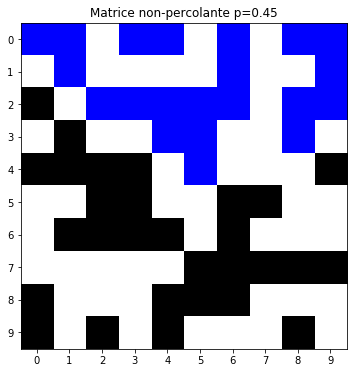

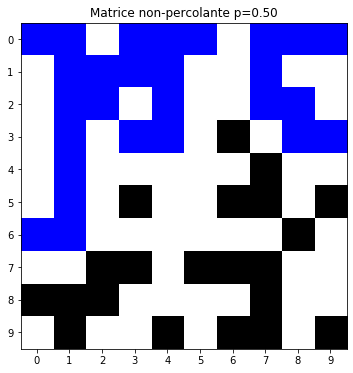

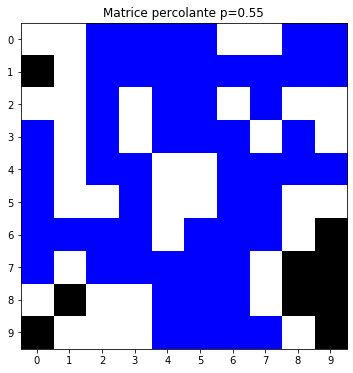

In [113]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def generate(n,p):
    return np.random.binomial(1,p,(n,n))

def voisin(ij,n):
    i,j = ij
    v = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    liste = v.copy()
    for (a,b) in liste:
        if a not in range(n) or b not in range(n):
            v.remove((a,b))
    return v

def fill(isopen):
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    while k < len(rempli):
        i,j = rempli[k]
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
            a,b = v
            if isopen[a][b] == 1 and v not in rempli:
                rempli.append(v)
        k += 1
    return isopen


n = 10
m1 = fill(generate(n,0.45))
m2 = fill(generate(n,0.5))
m3 = fill(generate(n,0.55))

colors = [(1,1,1),(0,0,0),(0,0,1)]
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=3)

plt.figure(figsize=(10,6))
plt.title(r'Matrice non-percolante p=0.45')
plt.imshow(m1,cmap=cm)
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

plt.figure(figsize=(10,6))
plt.title(r'Matrice non-percolante p=0.50')
plt.imshow(m2,cmap=cm)
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()

plt.figure(figsize=(10,6))
plt.title(r'Matrice percolante p=0.55')
plt.imshow(m3,cmap=cm)
plt.xticks(range(10))
plt.yticks(range(10))
plt.show()


**d)**
Définir une fonction `percolate(isopen)` permettant de déterminer si une matrice de booléens percole ou non.



In [2]:
import numpy as np

def generate(n,p):
    return np.random.binomial(1,p,(n,n))

def voisin(ij,n):
    i,j = ij
    v = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    liste = v.copy()
    for (a,b) in liste:
        if a not in range(n) or b not in range(n):
            v.remove((a,b))
    return v

def fill(isopen):
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    while k < len(rempli):
        i,j = rempli[k]
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
            a,b = v
            if isopen[a][b] == 1:
                rempli.append(v)
        k += 1
    return isopen

def percolate(isopen):
    # Si la matrice est percolante, alors il faut avoir au moins une coloration de la haut jusqu'en bas, c'est-à-dire
    # il existe une case valant 2 dans la dernière ligne
    m = fill(isopen)
    return 2 in m[-1]

m1 = generate(12,0.4)
m2 = generate(12,0.6)
print(fill(m1))
print("La matrice avec p = 0.4 est-il percolante?", percolate(m1))
print(fill(m2))
print("La matrice avec p = 0.6 est-il percolante?", percolate(m2))

[[0 0 2 0 0 2 2 0 0 2 0 0]
 [0 0 2 2 0 0 2 2 0 0 0 1]
 [0 0 2 0 0 1 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0 1 1]
 [0 0 1 0 1 1 1 1 0 0 0 1]
 [0 1 1 0 1 1 1 0 0 0 1 1]
 [1 0 0 0 0 1 0 0 0 1 1 1]
 [1 0 0 1 1 1 0 1 1 1 0 1]
 [0 1 1 0 1 0 0 0 0 0 1 1]
 [1 1 1 0 0 1 1 0 1 0 1 0]
 [0 1 0 1 1 0 1 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 1 1 1]]
La matrice avec p = 0.4 est-il percolante? False
[[0 2 0 0 2 0 0 0 2 2 0 2]
 [2 2 0 1 0 0 1 0 0 2 0 2]
 [2 0 1 1 1 0 1 1 0 2 0 0]
 [2 2 0 1 1 1 1 1 1 0 0 1]
 [2 0 1 1 0 0 1 1 0 1 1 0]
 [2 2 0 0 1 1 0 0 1 1 0 1]
 [2 2 2 2 0 1 1 1 0 0 0 0]
 [0 2 2 2 0 1 1 0 1 0 0 1]
 [2 2 2 0 0 0 1 1 1 1 1 0]
 [2 2 0 0 1 1 1 0 1 0 1 0]
 [0 2 0 0 0 0 0 0 1 0 0 0]
 [2 2 2 2 2 0 1 1 1 1 1 1]]
La matrice avec p = 0.6 est-il percolante? True



**e)**
<span style="color:red">!</span> Calculer le temps nécessaire pour déterminer si une matrice de taille $50 \times 50$ avec $p=0.9$ percole ou non. Lire la documentation du module `numba` pour réduire le temps de calcul en compilant une des fonctions: <https://numba.pydata.org/>.

<!-- --- begin hint in exercise --- -->

**Indication:**
La fonction qui est la plus utilisée est la fonction récursive, donc c'est celle-ci qu'il faut optimiser en la compilant.

<!-- --- end hint in exercise --- -->



In [34]:
%%timeit

# Calculer le temps du programme normal, sans utiliser numba

import numpy as np
# import time

def generate(n,p):
    return np.random.binomial(1,p,(n,n))

def voisin(ij,n):
    i,j = ij
    v = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    liste = v.copy()
    for (a,b) in liste:
        if a not in range(n) or b not in range(n):
            v.remove((a,b))
    return v

def fill(isopen):
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    while k < len(rempli):
        i,j = rempli[k]
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
            a,b = v
            if isopen[a][b] == 1:
                rempli.append(v)
        k += 1
    return isopen

def percolate(isopen):
    m = fill(isopen)
    return 2 in m[-1]

percolate(generate(50,0.9))

The slowest run took 4.61 times longer than the fastest. This could mean that an intermediate result is being cached.
1min 57s ± 1min 6s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
# Numba ne marche pas avec ce programme

import numpy as np
import time
from numba import jit

def generate(n,p):
    return np.random.binomial(1,p,(n,n))

def voisin(ij,n):
    i,j = ij
    v = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    liste = v.copy()
    for (a,b) in liste:
        if a not in range(n) or b not in range(n):
            v.remove((a,b))
    return v

@jit
def fill(isopen):
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    while k < len(rempli):
        i,j = rempli[k]
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
            a,b = v
            if isopen[a][b] == 1:
                rempli.append(v)
        k += 1
    return isopen

def percolate(isopen):
    m = fill(isopen)
    return 2 in m[-1]

start = time.time()
percolate(generate(50,0.9))
print(time.time() - start)

<ipython-input-21-ae73fb27c332>:19: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fill" failed type inference due to: Untyped global name 'voisin': cannot determine Numba type of <class 'function'>

File "<ipython-input-21-ae73fb27c332>", line 26:
def fill(isopen):
    <source elided>
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
        ^

  @jit
<ipython-input-21-ae73fb27c332>:19: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "fill" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-21-ae73fb27c332>", line 22:
def fill(isopen):
    <source elided>
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    ^

  @jit
C:\Users\Trung\Anaconda3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "fill" was compiled in object mode without forceobj=True, but

128.99399971961975



**f)**
En faisant des statistiques, déterminer la probabilité qu'une matrice aléatoire booléenne de taille $n \times n$ avec probabilité $p$ percole. Étudier cette probabilité en fonction de $p$ et de $n$.

<!-- --- begin hint in exercise --- -->

**Indication:**
Faire le graphique de cette probabilité de percolation en fonction de $p$ pour différentes valeurs de $n$.

<!-- --- end hint in exercise --- -->


<!-- --- begin answer of exercise --- -->
**Réponse:**
Dans la limite des $n$ très grands, une matrice percole presque surement si $p>0.592746$ et presque jamais sinon.

<!-- --- end answer of exercise --- -->



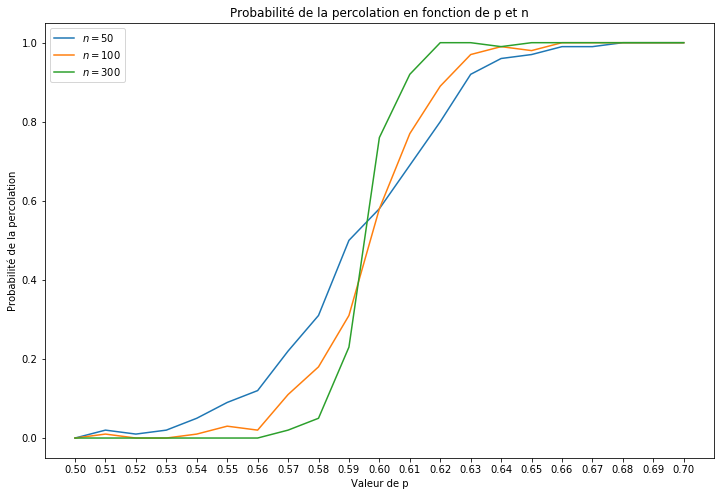

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate(n,p):
    return np.random.binomial(1,p,(n,n))

def voisin(ij,n):
    i,j = ij
    v = [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]
    liste = v.copy()
    for (a,b) in liste:
        if a not in range(n) or b not in range(n):
            v.remove((a,b))
    return v

def fill(isopen):
    rempli = [(0,j) for j in range(len(isopen)) if isopen[0][j]]
    k = 0
    while k < len(rempli):
        i,j = rempli[k]
        isopen[i][j] = 2
        for v in voisin((i,j),len(isopen)):
            a,b = v
            if isopen[a][b] == 1:
                rempli.append(v)
        k += 1
    return isopen

def percolate(isopen):
    m = fill(isopen)
    return 2 in m[-1]

def tester(n,p,k):
    # Cette fonction calcule la probabilité de la percolation en faisant le test k fois avec une matrice
    # aléatoire chaque fois de taille n x n et probabilité p
    perco = 0
    for i in range(k):
        if percolate(generate(n,p)):
            perco += 1
    return perco/k

N = [50,100,300] # Liste des valeurs de n que l'on va étudier
P = np.arange(0.5,0.71,0.01) # Liste des valeurs de p
k = 100 # Nombre de tests de la percolation pour chaque valeur de n et p

# Création d'un dictionnaire pour garder les données à collecter, où on a chaque n comme clef et une liste comme
# valeur. Chaque élément de cette liste est la probabilité correspondante à la valeur de p dans P, donc len(liste)
# est égal à len(P)
data = {n:[] for n in N}

for n in N:
    for p in P:
        data[n].append(tester(n,p,k))

plt.figure(figsize=(12,8))
plt.title(r'Probabilité de la percolation en fonction de p et n')
plt.xlabel(r'Valeur de p')
plt.ylabel(r'Probabilité de la percolation')
plt.xticks(P)


for n in N:
    plt.plot(P, data[n], label=r"$n = " + str(n) + "$")

plt.legend()
plt.show()

**Cette génération de données a pris vraiment beaucoup de temps pour compléter (environ 9 heures avec un ordinateur assez puissant) !**


**g)**
<span style="color:red">!!!</span> Les statistiques effectuées au point précédent sont un exemple typique de calculs pouvant être facilement exécutés en parallèle, car chaque cas est indépendant des autres. Paralléliser l'algorithme précédent de manière à utiliser tous les cœurs de votre processeur, par exemple à l'aide du module [`mpi4py`](http://mpi4py.readthedocs.io/).

<!-- --- begin hint in exercise --- -->

**Indication:**
L'utilisation de Jupyter Lab pour faire du calcul parallèle est assez complexe à mettre en œuvre, il vaut mieux utiliser la ligne de commande pour exécuter un script en parallèle, par exemple pour quatre cœurs: `mpirun -n 4 script.py`. A noter que [Open MPI](https://www.open-mpi.org/) ou [MPICH](https://www.mpich.org/) doit être installé sur votre ordinateur.

<!-- --- end hint in exercise --- -->

<!-- --- end exercise --- -->